#Question & Answer Section:





## Question-1: What is the impact of dataset normalization on the model's performance?

###Ans. 

To observe the impact of dataset normalization on the model performance, at first we will evaluate the performance of the model without normalizing the dataset, and then we will normalize the data and run the model.


#### Performance of the model without normalize the Dataset:
So first, Let's download a dataset and read it into a pandas dataframe. The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. 

In [1]:
import pandas as pd
import numpy as np
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Let's check how many data points we have.

In [2]:
concrete_data.shape

(1030, 9)

Let's check the dataset for any missing values.

In [3]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Let's check that if the dataset contains any null values

In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Split data into features and target value

In [5]:
concrete_data_columns = concrete_data.columns

features = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

Let's do a quick sanity check of the features and the target dataframes.

In [6]:
features.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Now, we don't normalize the data and provide the raw data into the model. Let's save the number of features to n_feats since we will need this number when building our network.

In [8]:
n_feats = features.shape[1] 

## Import Keras and build nerual network model

Let's import the Keras library and rest of the packages which we will need to build our regressoin model.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_feats,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# build the model
model = regression_model()

## Train the Network

Next, we will train and test the model at the same time using the fit method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.

In [10]:
# fit the model
history = model.fit(features, target, validation_split=0.3, epochs=100, verbose=0)

Visualize the model's training progress using the data stored in the history object.

In [11]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


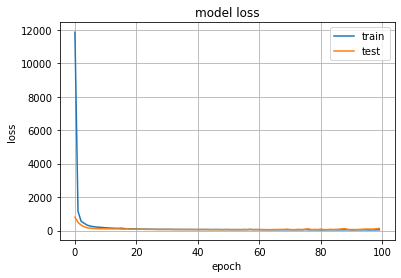

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()


#### Performance of the model with normalize the Dataset:
Now, We will observe the performance of model with normalizing the dataset. 

We will normalize the data by substracting the mean and dividing by the standard deviation.

In [13]:
features_norm = (features - features.mean()) / features.std()
features_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [14]:
# fit the model
history = model.fit(features_norm, target, validation_split=0.3, epochs=100, verbose=0)

In [15]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


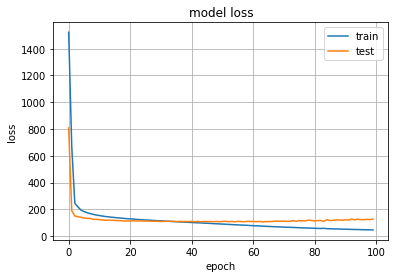

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

Now, it is seen from the two plots of the model loss that when the dataset is not normalized the loss is greater than the loss of that in the case when the dataset is normalized. Infact, it is seen from the earlier plot that the test loss is fluctuated very randomly. On the other hand, the test loss in the normalizing case is decreasing smoothly.

##Question-2: Can you change the network to reduce the training loss?

###Ans.
To reduce the training loss we have to make the model more deeper so that the model could learn more from the training data. The network previously discussed contains only 2 layers. So now, we will define another model which is deeper than the previous one.
 

 

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define new regression model
def regression_model():
    # create model
    modelnew1 = Sequential()
    modelnew1.add(Dense(50, activation='relu', input_shape=(n_feats,)))
    modelnew1.add(Dense(50, activation='relu'))
    modelnew1.add(Dense(50, activation='relu'))
    modelnew1.add(Dense(1))
    
    # compile model
    modelnew1.compile(optimizer='adam', loss='mean_squared_error')
    return model

# build the model
modelnew1 = regression_model()

In [18]:
# fit the model
history = modelnew1.fit(features_norm, target, validation_split=0.3, epochs=100, verbose=0)

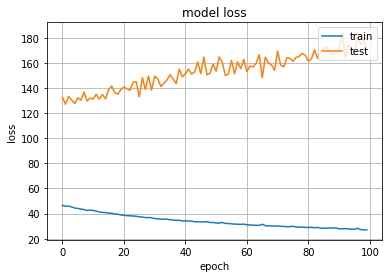

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

Now it i clearly seen that adding new layer surely lower the training loss but it overffits the data and thus has an impact on testing data evaluation. If we add another layer and evaluate the performance the situation becomes clearer. 

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define new regression model
def regression_model():
    # create model
    modelnew2 = Sequential()
    modelnew2.add(Dense(50, activation='relu', input_shape=(n_feats,)))
    modelnew2.add(Dense(50, activation='relu'))
    modelnew2.add(Dense(50, activation='relu'))
    modelnew2.add(Dense(50, activation='relu'))
    modelnew2.add(Dense(1))
    
    # compile model
    modelnew2.compile(optimizer='adam', loss='mean_squared_error')
    return model

# build the model
modelnew2 = regression_model()

In [21]:
# fit the model
history = modelnew1.fit(features_norm, target, validation_split=0.3, epochs=100, verbose=0)

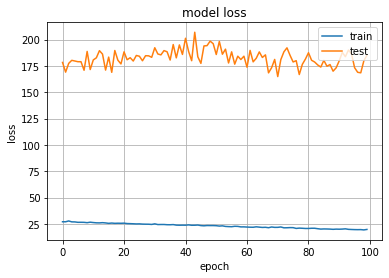

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

Again it is seen that increasing the number of layers will increase the testing loss even more.

##Question-3: Increase number of epochs and observe what impact it has on the training loss.

###Answer:

To observe the impact of ncrement of epochs on th training loss we first define the model and then evaluate the training parformance on different nmber of epochs. 

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_feats,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# build the model
model = regression_model()

Instead of using 100 epochs we now fit the model for 500 epochs

In [24]:
# fit the model
history = model.fit(features_norm, target, validation_split=0.3, epochs=500, verbose=0)

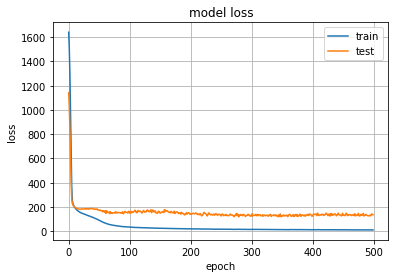

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

If we now fit the model for 1000 epochs then we will see that the training loss is decreasing even more. 

In [26]:
# fit the model
history = model.fit(features_norm, target, validation_split=0.3, epochs=1000, verbose=0)

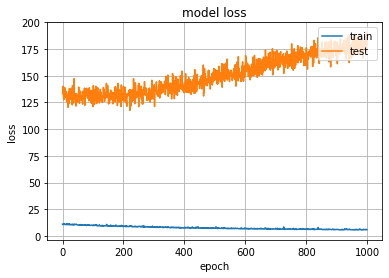

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

##Question-4: Do you see any problem with reduced training loss?

##Answer:

It is seen from the loss curve of the previous answer that the more we increase the number of epochs the testing loss is increased which indicates that the model is overfitted. Though the training loss in decreased, the model can not perform well in the testing dataset. 

##Question-5: Use your best model to predict the concrete strength of an arbitrary data sample.

##Answer:

At first, we will define the arbitrary data sample.




In [28]:
Xnew = [[0.491187, 	0.795140, 	-0.846733, 	2.174405, 	-1.038638, 	-0.526262, 	-2.239829 ,	5.055221]]



Now we define our regression model 

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(n_feats,)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# build the model
model = regression_model()

Finally, we will use model.predict function to predict the concrete strength. 

In [30]:
# fit the model
history = model.fit(features_norm, target, validation_split=0.3, epochs=100, verbose=0)

ynew = model.predict(Xnew)

In [31]:
print(ynew)

[[50.734303]]
